In [1]:
import h5py
import numpy as np
from build_dataset import PoseVideo
import os
import moviepy.editor as mpy
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
import keras.backend as K
import cv2

Using TensorFlow backend.


In [2]:
def heatmap_to_bodypart_location(heatmap):
    return np.unravel_index(np.argmax(heatmap, axis=None), heatmap.shape)
    
def extract_central_frame(tensor):
    return tensor[0]

def predict_video(video_path, model_path):
    
    model =  models.load_model(model_path, custom_objects={'tf':tf, 
                                                             'cv2':cv2,
                                                             'total_frames':5, 
                                                             'num_bodyparts':6, 
                                                             'frame_height':224,
                                                             'frame_width':224,
                                                             'frame_channels':3})

    vid_data = PoseVideo(video_path)
    labelled_frames = []
    
    for batch in vid_data.predict_data:
        labelled_frames.append(model.predict_on_batch(batch))
        
    return labelled_frames
    

In [21]:
test_video_path = r"/home/bhandawatlab_duke/deep-pose-predict/181023_1_12_video2.avi"
model_path = r"/home/bhandawatlab_duke/Pose-Estimation-Keras/pretrained_models/model011119_spatial.h5"

vid_data = PoseVideo(test_video_path)

In [22]:
vid_data.predict_data.shape

(387, 5, 224, 224, 3)

In [23]:
total_frames = 5
frame_height = 224
frame_width = 224
frame_channels = 3
num_bodyparts = 6


model =  models.load_model(model_path, custom_objects={'tf':tf, 
                                                             'cv2':cv2,
                                                             'total_frames':5, 
                                                             'num_bodyparts':6, 
                                                             'frame_height':224,
                                                             'frame_width':224,
                                                             'frame_channels':3})


In [24]:
sample_no = 1
frame = 0
bp_no = 1



In [25]:
test_arr = model.predict_on_batch(vid_data.predict_data[sample_no])

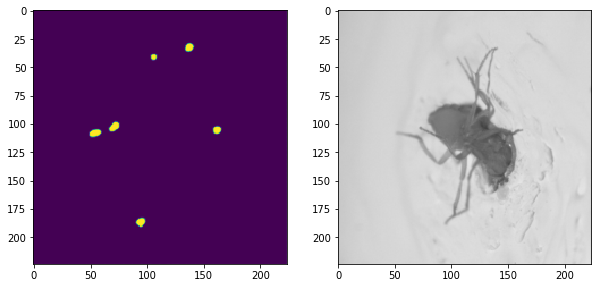

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

frame = 0
bp_no = 1
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(np.squeeze(test_arr[frame][ :, :, :]))

plt.subplot(122)
plt.imshow(vid_data.predict_data[sample_no][frame])

In [40]:
model_path = r"/home/bhandawatlab_duke/Pose-Estimation-Keras/pretrained_models/model010919.h5"

model =  models.load_model(model_path, custom_objects={'tf':tf, 
                                                             'cv2':cv2,
                                                             'total_frames':5, 
                                                             'num_bodyparts':6, 
                                                             'frame_height':224,
                                                             'frame_width':224,
                                                             'frame_channels':3})


In [41]:
test_arr = model.predict_on_batch(vid_data.predict_data[sample_no])


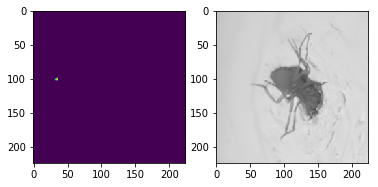

In [54]:
bp_no = 5
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(121)
plt.imshow(test_arr[frame][ :, :, bp_no])

plt.subplot(122)
plt.imshow(vid_data.predict_data[sample_no][frame])


In [55]:
model_path = r"/home/bhandawatlab_duke/Pose-Estimation-Keras/pretrained_models/model_sep_fusion_11119.h5"

model =  models.load_model(model_path, custom_objects={'tf':tf, 
                                                             'cv2':cv2,
                                                             'total_frames':5, 
                                                             'num_bodyparts':6, 
                                                             'frame_height':224,
                                                             'frame_width':224,
                                                             'frame_channels':3})

In [56]:
test_arr = model.predict_on_batch(vid_data.predict_data[sample_no])

pred_separate_classes = test_arr[0]
pred_joint_classes = test_arr[1]


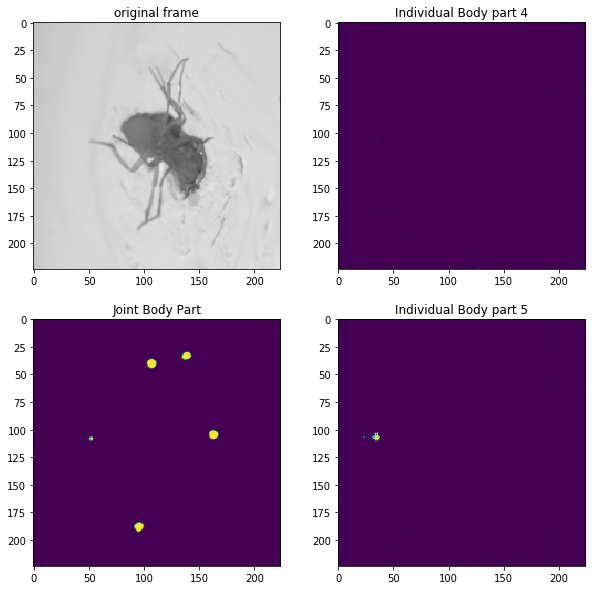

In [60]:

import matplotlib.pyplot as plt
%matplotlib inline
bp_no = 4
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("original frame")
plt.imshow(vid_data.predict_data[sample_no][frame])

plt.subplot(222)
plt.title("Individual Body part "+str(bp_no))
plt.imshow(pred_separate_classes[frame][ :, :, bp_no])

plt.subplot(223)
plt.title("Joint Body Part")
plt.imshow(np.squeeze(pred_joint_classes[frame][ :, :, :]))

plt.subplot(224)
plt.title("Individual Body part "+str(bp_no+1))
plt.imshow(pred_separate_classes[frame][ :, :, bp_no+1])